**Proyek Analisis Data: Ecommerce Public Data Set**

Nama: Merina Putri kusuma Dewi

Email: merinaputrikd@gmail.com

ID Dicoding:

Menentukan Pertanyaan Bisnis
1. Apa produk terlaris berdasarkan *city* dan *state*?
2. Bagaimana profil demografis *customers*?
3. Bagaimana tingkat kepuasan *customers*?
4. Bagaimana tingkat cicilan *customers*?
5. Berapa tingkat pembayaran menggunakan *credit card* yang dilakukan oleh *customers* pada pembelian produk?

In [ ]:
from google.colab import files
uploaded = files.upload()


In [15]:
import os
os.listdir('/content/')


['.config',
 'order_reviews_dataset.csv',
 'geolocation_dataset.csv',
 'products_dataset.csv',
 'order_items_dataset.csv',
 'customers_dataset.csv',
 'orders_dataset.csv',
 'sellers_dataset.csv',
 'order_payments_dataset.csv',
 'product_category_name_translation.csv',
 'sample_data']

**Memanggil semua library**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA WRANGLING**

**Gathering Data**

In [18]:
#membuat tabel customers
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
#membuat tabel geolocation
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
#membuat tabel order items
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
#membuat tabel order payments
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
#membuat tabel order reviews
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
# memuat tabel orders
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
#membuat tabel product category name translation
product_category_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
# membuat tabel products
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
#membuat tabel sellers
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight**


1. Dataset: order_items_df, orders_df, products_df, sellers_df
2. Dataset: customers_df, order_items_df, orders_df, products_df, sellers_df
3. order_items_df, orders_df, products_df, sellers_df
4. Dataset: customers_df, order_df, order_payments_df, product_category_df
5. Dataset: customers_df, order_df, order_payments_df, product_category_df

**ASSESING DATA**

In [27]:
#cek tipe data customers
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
#menemukan missing values customers
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [29]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [31]:
#cek tipe data geolocation
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [32]:
#menemukan missing value geolocation
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [33]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [34]:
#cek tipe data order items
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
#menemukan missing values order items
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [36]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [38]:
#cek tipe data order payments
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
#menemukan missing values order payments
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [40]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [42]:
#cek tipe data order reviews
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [43]:
#menemukan missing values order reviews
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [44]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [46]:
#cek tipe data orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [47]:
#menemukan missing values orders
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [48]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [50]:
#cek tipe data product translation
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
#menemukan missing values
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [52]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Products Dataset**

In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
#menemukan missing values products
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [56]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [57]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Sellers Dataset**

In [58]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [59]:
#menemukan missing values sellers
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [60]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [61]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight**
1. Missing  values pada orders_df dapat mempengaruhi analisis waktu pengiriman pesanan, sehingga perlu dilakukan imputation.
2. Missing values pada products_df dapat menyebabkan analisis terkait kategori produk atau karakteristik produk menjadi tidak lengkap.
3. Duplikasi data pada geolocation_df dapat menyebabkan hasil yang tidak akurat dalam analisis distribusi geografis pelanggan, sehingga perlu dilakukan dropping.

**Cleaning Data**

Data Duplicate

In [62]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


order reviews

In [63]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [64]:
order_reviews_dropcol=[ "review_comment_title","review_comment_message"]

order_reviews_df.drop(order_reviews_dropcol, axis= 1, inplace= True)

order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [65]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [66]:
orders_dropcol=[ "order_approved_at",
                 "order_delivered_carrier_date",
                 "order_estimated_delivery_date"]

orders_df.drop(orders_dropcol, axis= 1, inplace= True)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02


In [67]:
#menemukan missing values products
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [68]:
import pandas as pd

# Mengisi missing values dengan median untuk beberapa kolom
product_dropcol = ["product_name_lenght",
                    "product_description_lenght",
                    "product_photos_qty",
                    "product_weight_g",
                    "product_length_cm",
                    "product_height_cm",
                    "product_width_cm"]

products_df.drop(product_dropcol, axis= 1, inplace= True)

products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


**Imputation**

In [69]:
products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


<ipython-input-69-6a463ded595a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)


**Mengatasi kesalahan tipe data**

In [70]:
items_datetime = ["shipping_limit_date"]

for col in items_datetime:
  order_items_df[col] = pd.to_datetime(order_items_df[col])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [71]:
reviews_datetime = ["review_creation_date"]

for col in reviews_datetime:
  order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.8+ MB


**Insight**
Cleaning data ini dilakukan agar hasil olah data yang diperoleh nantinya lebih akurat. Cleaning data yang dilakukan yakni berupa penghapusan data duplikat, penghapusan kolom yang tidak digunakan dalam analisis, pengisian nilai kosong, dan pengubahan tipe data datetime.

**Exploraty Data Analysis (EDA)**

Explore All Data

In [74]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")

In [75]:
all_df = pd.merge(orders_df, order_items_df, on="order_id", how="left")
all_df = pd.merge(all_df, order_payments_df, on="order_id", how="left")
all_df = pd.merge(all_df, order_reviews_df, on="order_id", how="left")
all_df = pd.merge(all_df, customers_df, on="customer_id", how="left")
all_df = pd.merge(all_df, products_df, on="product_id", how="left")
all_df = pd.merge(all_df, product_category_df, on="product_category_name", how="left")


**Explore Data order_items_df, orders_df, products_df, sellers_df**

untuk pertanyaan 1


In [76]:
# Merge data order_items_df dengan orders_df
items_products_df = pd.merge(
    left=order_items_df,
    right=orders_df[["order_id", "customer_id"]],
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

# Merge data items_products_df dengan sellers_df
items_products_df = pd.merge(
    left=items_products_df,
    right=sellers_df[["seller_id", "seller_city", "seller_state"]],
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

# Merge data items_products_df dengan products_df
items_products_df = pd.merge(
    left=items_products_df,
    right=products_df[["product_id", "product_category_name"]],
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,seller_city,seller_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,borda da mata,MG,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,franca,SP,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,loanda,PR,ferramentas_jardim


In [77]:
best_selling_state = items_products_df.groupby(["seller_state", "product_id"]).size().reset_index(name="order_count")
top_selling_per_state = best_selling_state.loc[best_selling_state.groupby("seller_state")["order_count"].idxmax()]

In [78]:
best_selling_city = items_products_df.groupby(["seller_city", "product_id"]).size().reset_index(name="order_count")
top_selling_per_city = best_selling_city.loc[best_selling_city.groupby("seller_city")["order_count"].idxmax()]

**Explore Data customers_df & items_products_df**

untuk menjawab pertanyaan 2

In [79]:
# Jumlah customers per city
city_count = customers_df["customer_city"].value_counts().head(10)

In [80]:
# Jumlah customers per state
state_count = customers_df["customer_state"].value_counts()

In [81]:
product_customer_df = items_products_df.groupby(["product_category_name", "customer_id"]).size().reset_index(name="order_count")
category_count = product_customer_df.groupby("product_category_name")["order_count"].count()

**Explore data order_reviews_df & items_products_df**

untuk menjawab pertanyaan 3

In [82]:
# Merge data order_reviews_df dengan items_products_df
review_by_category = pd.merge(
    left=order_reviews_df,
    right=items_products_df[["order_id", "product_category_name"]],
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

review_by_category.head()


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06,ferramentas_jardim


**Explore data order_payments_df & items_products_df**


untuk menjawab pertanyaan 4 dan 5

In [83]:
# Merge data order_payments_df & items_products_df
order_by_installments = pd.merge(
    left=order_payments_df,
    right=items_products_df[["product_category_name", "order_id"]], # Removed the non-existent column and replaced with an existing one.
    how="inner",
    left_on="order_id", # Changed to match the column in the right DataFrame.
    right_on="order_id"
)

order_by_installments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,casa_construcao
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,automotivo
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,perfumaria
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,cama_mesa_banho
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,cama_mesa_banho


**Insight:**

1. Melalui pengelompokkan berdasarkan negara bagian dan kota, dapat diidentifikasi produk yang memiliki penjualan terbanyak. Kita juga dapat melihat variasi penjualan produk di berbagai negara bagian dan kota.
2. Melalui perhitungan jumlah pelanggan per kota, kita dapat mengidentifikasi kota-kota dengan konsentrasi pelanggan tertinggi. Kita juga dapat melihat distribusi pelanggan di berbagai negara bagian melalui status pelanggan dan melihat bagaimana ketertarikan terhadap produk tertentu berdasarkan demografi pelanggan.
3. Melalui perhitungan rata-rata skor ulasan berdasarkan kategori produk, kita dapat mengidentifikasi kategori produk dengan penilaian terbaik.
4. Melalui perhitungan rata-rata payment installments, kita dapat mengidentifikasi kategori produk apa yang paling tinggi dengan lama cicilannya.
5. Melalui perhitungan count payment type, kita dapat mengidentifikasi tipe pembayaran credit yang digunakan untuk 10 kategori produk terlaris.

**VISUALIZATION & EXPLANATORY ANALYSIS**

1. Produk apa yang terlaris jika dilihat dari Product ID?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

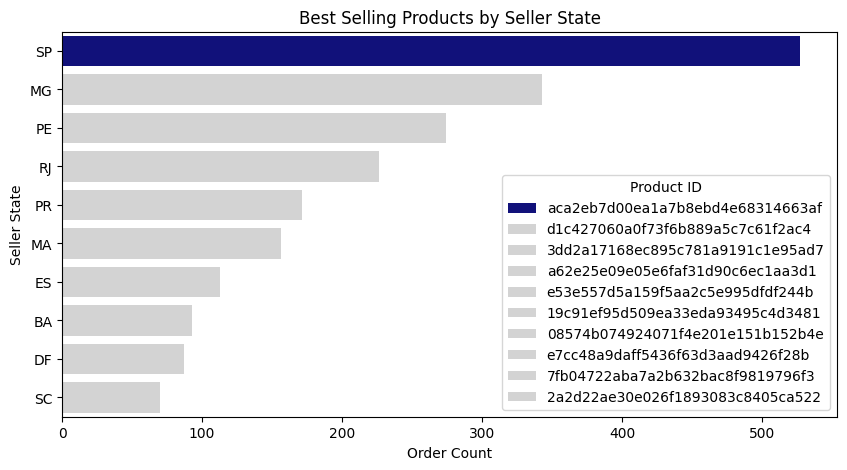

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

top_selling_per_state_sorted = top_selling_per_state.sort_values(by="order_count", ascending=False)

top_10_selling_per_state = top_selling_per_state_sorted.head(10)

colors = ["darkblue" if i == top_10_selling_per_state["order_count"].max() else "lightgrey" for i in top_10_selling_per_state["order_count"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_selling_per_state, x="order_count", y="seller_state", hue="product_id", palette=colors, dodge=False)
plt.title("Best Selling Products by Seller State")
plt.xlabel("Order Count")
plt.ylabel("Seller State")
plt.legend(title="Product ID")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

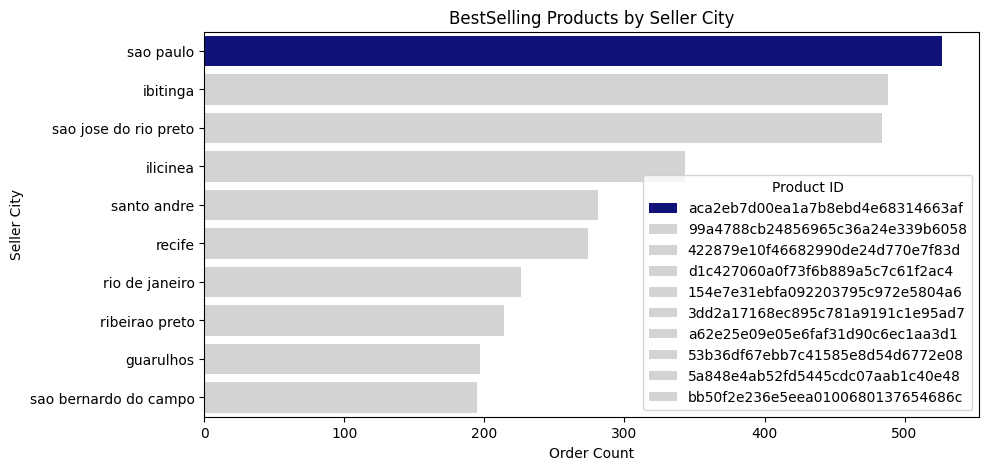

In [85]:
top_selling_per_city_sorted = top_selling_per_city.sort_values(by="order_count", ascending=False)

top_10_selling_per_city = top_selling_per_city_sorted.head(10)

colors_city = ["darkblue" if i == top_10_selling_per_city["order_count"].max() else "lightgrey" for i in top_10_selling_per_city["order_count"]]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_selling_per_city, x="order_count", y="seller_city", hue="product_id", palette=colors_city, dodge=False)
plt.title("BestSelling Products by Seller City")
plt.xlabel("Order Count")
plt.ylabel("Seller City")
plt.legend(title="Product ID")
plt.show()

**Insight**

Kedua Bar Chart di atas menampilkan sepuluh produk dengan penjualan tertinggi berdasarkan negara bagian dan kota. Produk yang paling banyak terjual di negara-negara bagian tercantum di sebelah grafik, yang menampilkan berbagai ID produk. Dari kedua grafik tersebut, terlihat bahwa negara bagian **São Paulo (SP)** memiliki produk dengan penjualan terbanyak, di mana kotanya adalah **São Paulo.**

2. Bagaimana profil demografis pelanggan?

<ipython-input-86-22031d6403e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

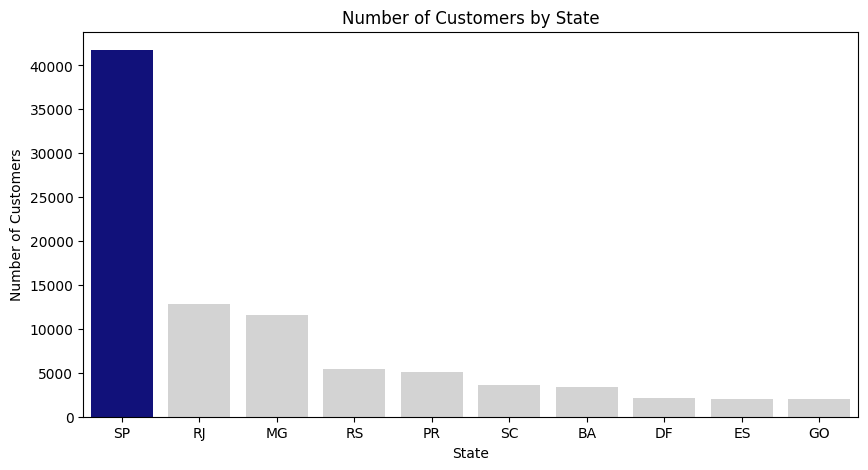

In [86]:
top_states = state_count.nlargest(10)

colors = ["darkblue" if count == top_states.max() else "lightgrey" for count in top_states]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette=colors)
plt.title("Number of Customers by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()


**Insight:**

Kedua Bar Chart di atas menampilkan distribusi pelanggan berdasarkan negara bagian dan kategori produk, yang menunjukkan variasi dalam demografi pelanggan, baik berdasarkan wilayah geografis maupun preferensi kategori produk.

Pada grafik pertama, ditunjukkan sepuluh negara bagian dengan jumlah pelanggan terbanyak. Grafik ini menunjukkan bahwa negara bagian dengan jumlah pelanggan tertinggi adalah **São Paulo (SP).** Hal ini menunjukkan bahwa **São Paulo** adalah pasar terbesar berdasarkan jumlah pelanggan.

Pada grafik kedua, ditunjukkan sepuluh kategori produk yang memiliki jumlah pelanggan terbanyak. Kategori produk dengan jumlah pelanggan tertinggi adalah **cama_mesa_banho**, yang mengindikasikan bahwa kategori ini paling populer di kalangan pelanggan.

3. Bagaimana tingkat kepuasan pembeli?

In [87]:
# Menghitung rata-rata skor ulasan per kategori produk
average_review_score = review_by_category.groupby('product_category_name')['review_score'].mean().reset_index()

# Mengubah nama kolom untuk kejelasan
average_review_score.columns = ['product_category_name', 'average_review_score']

# Melihat hasil
print(average_review_score)


        product_category_name  average_review_score
0   agro_industria_e_comercio              4.000000
1                   alimentos              4.218182
2           alimentos_bebidas              4.315412
3                       artes              3.937198
4          artes_e_artesanato              4.125000
..                        ...                   ...
68    sinalizacao_e_seguranca              4.086294
69   tablets_impressao_imagem              4.123457
70                  telefonia              3.946867
71             telefonia_fixa              3.683206
72      utilidades_domesticas              4.055019

[73 rows x 2 columns]


<ipython-input-88-80b9fa261163>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

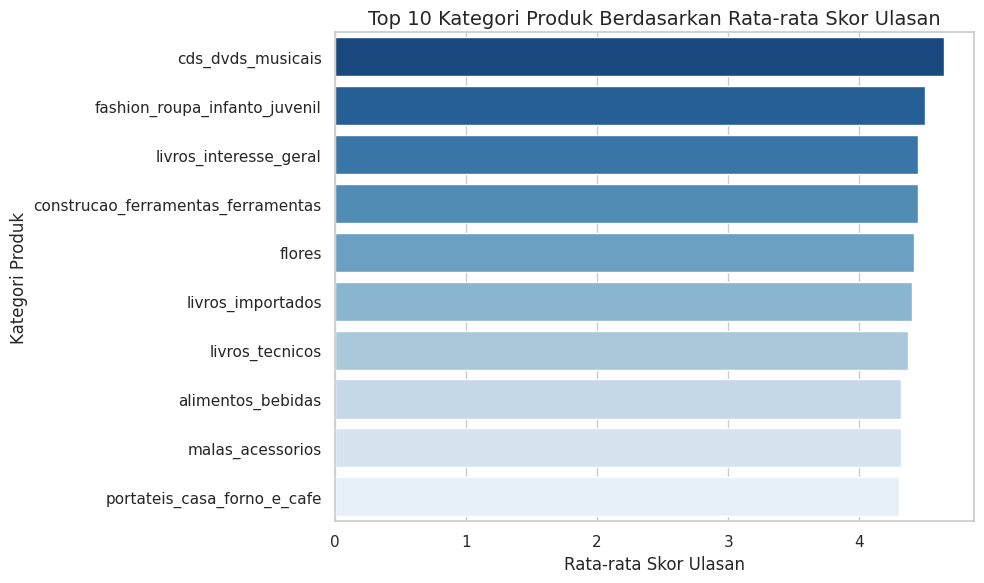

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata skor ulasan per kategori produk
avg_review_by_category = review_by_category.groupby('product_category_name')['review_score'].mean().reset_index()

# Mengurutkan kategori berdasarkan rata-rata skor ulasan, dan ambil 10 teratas
top_10_categories = avg_review_by_category.sort_values(by='review_score', ascending=False).head(10)

# Set ukuran figure dan tema seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Membuat bar plot menggunakan seaborn
sns.barplot(
    x='review_score',
    y='product_category_name',
    data=top_10_categories,
    palette='Blues_r'
)

# Menambahkan judul dan label sumbu
plt.title('Top 10 Kategori Produk Berdasarkan Rata-rata Skor Ulasan', fontsize=14)
plt.xlabel('Rata-rata Skor Ulasan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


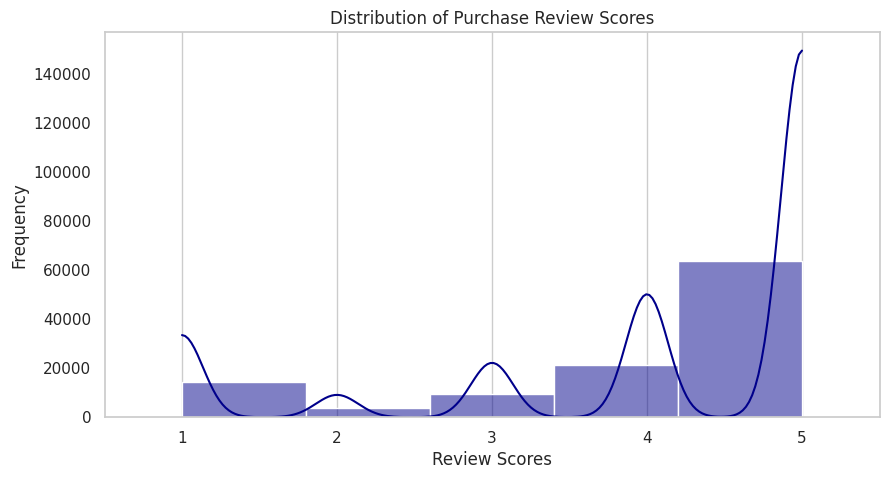

In [89]:
plt.figure(figsize=(10, 5))
sns.histplot(review_by_category["review_score"], bins=5, kde=True, color="darkblue")
plt.title("Distribution of Purchase Review Scores")
plt.xlabel("Review Scores")
plt.ylabel("Frequency")
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)
plt.grid(axis="y")
plt.show()

**Insight:**

Bar Chart menunjukkan sepuluh kategori produk dengan rata-rata skor ulasan tertinggi. Grafik ini menunjukkan bahwa produk dalam kategori **CDs, DVDs, Musicais** memiliki rata-rata dengan penilaian yang tertinggi dibandingkan kategori produk lainnya. Ini menunjukkan bahwa pelanggan merasa lebih puas terhadap kategori produk **CDs, DVDs, Musicais.**

Histogram distribusi skor ulasan menggambarkan bagaimana skor ulasan dari pelanggan tersebar dalam skala 1 hingga 5. Mayoritas ulasan terkonsentrasi pada **skor 4 dan 5**, yang menunjukkan bahwa pelanggan merasa puas dengan produk yang mereka beli. Namun, tidak menutup kemungkinan bahwa masih ada yang tidak puas terhadap beberapa produk karena ada beberapa ulasan dengan skor yang lebih rendah.

4. Bagaimana tingkat cicilan customers?

<ipython-input-90-46bd2805402e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

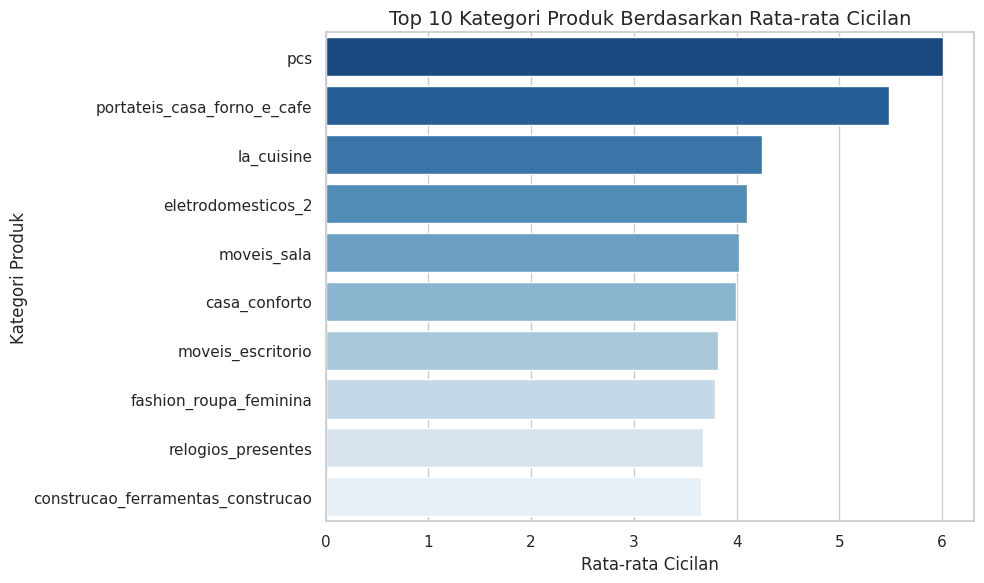

In [90]:
# Menghitung rata-rata cicilan per kategori produk
avg_installments_by_category = order_by_installments.groupby('product_category_name')['payment_installments'].mean().reset_index()

# Mengurutkan kategori berdasarkan rata-rata cicilan, dan ambil 10 teratas
top_10_installments = avg_installments_by_category.sort_values(by='payment_installments', ascending=False).head(10)

# Set ukuran figure dan tema seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Membuat bar plot menggunakan seaborn
sns.barplot(
    x='payment_installments',
    y='product_category_name',
    data=top_10_installments,
    palette='Blues_r'
)

# Menambahkan judul dan label sumbu
plt.title('Top 10 Kategori Produk Berdasarkan Rata-rata Cicilan', fontsize=14)
plt.xlabel('Rata-rata Cicilan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
Dapat kita lihat, bahwa rata-rata cicilan **terlama** yang dilakukan oleh *customer* ketika membeli barang adalah kategori **pcs**, yakni selama 6 bulan. Sedangkan, rata-rata cicilan **tercepat** yakni kurang dari 4 bulan yaitu pada kategori produk **construcao_ferramentas_construcao.**

5. Berapa tingkat pembayaran menggunakan credit card yang dilakukan oleh customers pada pembelian produk?

<ipython-input-91-c9c554e8f7f8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

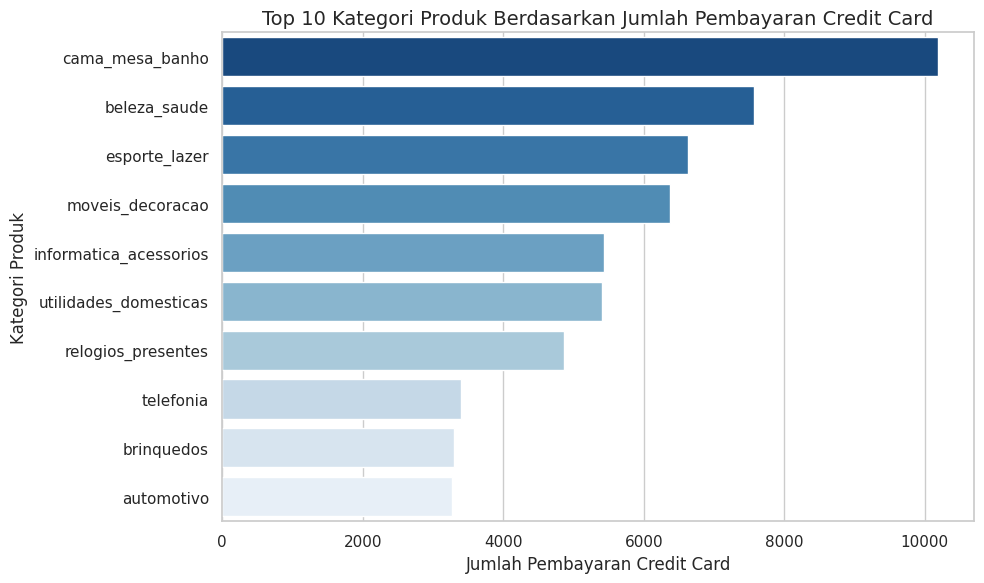

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data hanya untuk tipe pembayaran 'credit_card'
credit_card_payments = order_by_installments[order_by_installments['payment_type'] == 'credit_card']

# Menghitung jumlah pembayaran berdasarkan kategori produk
payment_counts_by_category = credit_card_payments.groupby('product_category_name')['payment_type'].count().reset_index()

# Mengganti nama kolom agar lebih deskriptif
payment_counts_by_category = payment_counts_by_category.rename(columns={'payment_type': 'payment_count'})

# Mengurutkan kategori berdasarkan jumlah pembayaran, dan ambil 10 teratas
top_10_categories_by_payment = payment_counts_by_category.sort_values(by='payment_count', ascending=False).head(10)

# Set ukuran figure dan tema seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Membuat bar plot dengan seaborn
sns.barplot(
    x='payment_count',
    y='product_category_name',
    data=top_10_categories_by_payment,
    palette='Blues_r'
)

# Menambahkan judul dan label sumbu
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pembayaran Credit Card', fontsize=14)
plt.xlabel('Jumlah Pembayaran Credit Card', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Insight:**

Kategori produk yang terbanyak menggunakan tipe pembayaran *credit card* adalah *cama_mesa_banho* dengan lebih dari 10.000 transaksi, sedangkan kategori produk yang paling sedikit menggunakan tipe pembayaran ini adalah *automotivo dengan sejumlah kurang dari 4000 transaksi.

**Kesimpulan**

Dari analisis yang dilakukan pada beberapa diagram batang, dapat disimpulkan bahwa:

1. **Penjualan Produk**:
   - Negara bagian São Paulo (SP) mencatatkan penjualan tertinggi, dengan kota São Paulo sebagai pusatnya. Ini menunjukkan bahwa São Paulo merupakan pasar utama dalam penjualan produk.

2. **Distribusi Pelanggan**:
   - Negara bagian yang memiliki jumlah pelanggan terbanyak juga adalah São Paulo, menegaskan posisinya sebagai pasar terbesar berdasarkan demografi pelanggan.
   - Kategori produk yang paling diminati oleh pelanggan adalah **cama_mesa_banho**, menandakan preferensi yang jelas dalam pembelian.

3. **Skor Ulasan Produk**:
   - Produk dalam kategori **CDs, DVDs, Musicais** mendapatkan skor ulasan tertinggi, mencerminkan kepuasan pelanggan yang lebih besar terhadap kategori ini.
   - Histogram menunjukkan bahwa mayoritas skor ulasan berkisar pada angka 4 dan 5, menandakan tingkat kepuasan yang baik di kalangan pelanggan. Namun, adanya ulasan dengan skor lebih rendah menunjukkan bahwa masih ada pelanggan yang tidak puas dengan beberapa produk.

4. **Rata-rata Cicilan Pembayaran**:
   - Rata-rata cicilan terlama terjadi pada kategori **pcs**, dengan durasi hingga 6 bulan, sedangkan rata-rata cicilan tercepat kurang dari 4 bulan terdapat pada kategori produk **construcao_ferramentas_construcao**.

5. **Tipe Pembayaran**:
   - Kategori produk **cama_mesa_banho** mendominasi penggunaan metode pembayaran **credit card** dengan lebih dari 10.000 transaksi, sedangkan kategori **automotivo** mencatatkan jumlah transaksi terendah dengan kurang dari 4.000.

Secara keseluruhan, analisis ini memberikan wawasan yang mendalam mengenai pola penjualan, preferensi produk, tingkat kepuasan pelanggan, dan metode pembayaran yang digunakan, yang dapat digunakan untuk strategi pemasaran dan pengembangan produk yang lebih baik di masa mendatang.

In [95]:
all_df.to_csv("all_data_fix.csv", index=False)